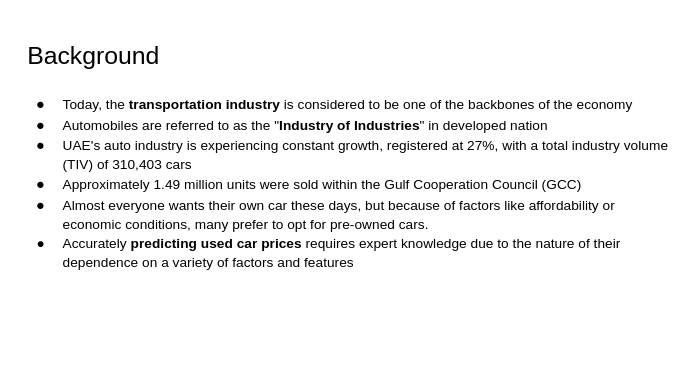

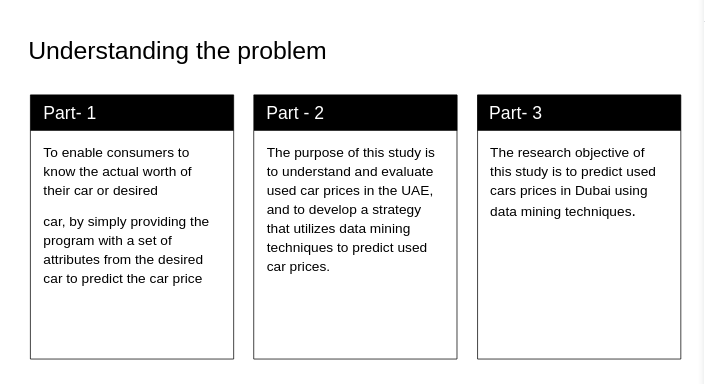

## 1- Problem Statement

Because of the record volume of cars purchased and sold, used car price forecast is a trending issue.
People tend to buy used automobiles more frequently in developing nations since they are more affordable.
This project's main goal is to calculate used car costs using attributes that have a strong correlation with a label (Price). 

In [1]:
import numpy as np
import pandas as pd
import copy

## 2- Methodologies

Classification and Regression are two most important techniques of machine learning, but having very different nature of solving problem set. In our problem of car price prediction, typically regression models are used because of numeric and continous nature of target variable, but because in the dataset given, after selecting some ranges, target variable converts into static value of 4 bins, called classes, and now classification is applicable to this dataset.

There are 14 dimensions of data, means 14 different data columns amongs which 4 columns are not related to final target variable of price or price_band in either of classification or regression problem. We eliminate these columns which can reduce data dimensions as well as helps us in optimizing our techniques to give better results.

## 3- Findings / Insights

In [7]:
Data=pd.read_csv('7v0015-cw-classification-adverts.csv')
print ("Shape of Data is : ", Data.shape)

RegressionData=pd.read_csv('7v0015-cw-regression-adverts.csv')
print ("Shape of Data is : ", Data.shape)

Shape of Data is :  (96269, 14)
Shape of Data is :  (96269, 14)


In [8]:
# show 10 random samples from dataset
Data.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
30398,202009224062905,139800.0,60,Silver,Mercedes-Benz,C Class,USED,2010.0,Saloon,False,Diesel,Mercedes-Benz - C Class,12,medium
37812,202004178978592,91931.0,59,Silver,BMW,5 Series,USED,2009.0,Saloon,False,Petrol,BMW - 5 Series,13,medium
49060,202010205230523,20617.0,66,Black,Mercedes-Benz,A Class,USED,2017.0,Hatchback,False,Diesel,Mercedes-Benz - A Class,5,high
65722,202010215242550,50760.0,63,Blue,BMW,1 Series,USED,2013.0,Hatchback,False,Diesel,BMW - 1 Series,9,medium
23305,202010064655576,88000.0,61,White,Vauxhall,Corsa,USED,2011.0,Hatchback,False,Petrol,Vauxhall - Corsa,11,medium
50287,202009214007196,62323.0,61,Black,BMW,3 Series,USED,2012.0,Saloon,False,Diesel,BMW - 3 Series,10,medium
37311,202010265435535,45890.0,64,White,BMW,5 Series,USED,2014.0,Saloon,False,Diesel,BMW - 5 Series,8,high
60042,202010134947692,50000.0,64,Black,Volkswagen,Golf,USED,2014.0,Hatchback,False,Petrol,Volkswagen - Golf,8,high
15418,202009153753616,12116.0,67,White,Mercedes-Benz,A Class,USED,2018.0,Hatchback,False,Petrol,Mercedes-Benz - A Class,4,high
72466,202008122375265,20118.0,68,Grey,Mercedes-Benz,C Class,USED,2019.0,Saloon,False,Diesel,Mercedes-Benz - C Class,3,very high


In [9]:
# Statistical description of Data
Data.describe()

,public_reference,mileage,year_of_registration,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,6.903925
std,1.194558e+10,34051.708175,3.766205,3.766205
min,2.014120e+14,0.000000,1962.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,60.000000


#### Merge Needed
Take price band column from Classification data and merge that column in regression data , so that we can add price range of an automobile as a feature to predict as accurate price as possible.
We have done outer join so that all cars price band should be there in dataset.

In [10]:
Price_Band = Data[['public_reference','price_band']]
RegressionData=RegressionData.merge(Price_Band,on='public_reference',how='outer')
RegressionData

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5,high
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6,high
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10,medium
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4,medium
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,202010295556637,28225.0,17,White,Mercedes-Benz,C Class,USED,2017.0,18499,Saloon,False,Diesel,Mercedes-Benz - C Class,5,high
96265,202010305614799,122000.0,07,Silver,BMW,3 Series,USED,2007.0,1990,Saloon,False,Petrol,BMW - 3 Series,15,low
96266,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol,Vauxhall - Corsa,7,medium
96267,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol,Nissan - Juke,3,high


In [11]:
# Model of Cars under each Price Band
models=Data.groupby(['price_band','standard_model'])['standard_model'].count()
models=pd.DataFrame(models)
models

standard_model
price_band standard_model                
high       1 Series                  3215
           3 Series                  2819
           5 Series                  1357
           500                        211
           A Class                   3640
...                                   ...
very high  Juke                        60
           Polo                        29
           Qashqai                    323
           Sportage                   496
           Yaris                        5

[73 rows x 1 columns]

### Data Understanding and Exploration

In [12]:
Data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,Hatchback,False,Petrol,MINI - Hatch,5,high
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,Estate,False,Diesel,Volkswagen - Golf,6,high
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,Saloon,False,Petrol,Mercedes-Benz - C Class,10,medium
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,Hatchback,False,Petrol,Vauxhall - Corsa,4,medium
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,SUV,False,Diesel,Nissan - Qashqai,6,high


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   body_type              96269 non-null  object 
 9   crossover_car_and_van  96269 non-null  bool   
 10  fuel_type              96269 non-null  object 
 11  make_model             96269 non-null  object 
 12  age                    96269 non-null  int64  
 13  price_band             96269 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usa

In [14]:
## Which car has a maximum price
C= np.where(RegressionData['price'] == RegressionData['price'].max())
print ("Highest price of car in records is : BMW, 2017 registration, 3 Series Grey Color, having price of 158500 USD")
RegressionData.iloc[C]

Highest price of car in records is : BMW, 2017 registration, 3 Series Grey Color, having price of 158500 USD


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
71123,202009284318561,32078.0,17,Grey,BMW,3 Series,USED,2017.0,158500,Saloon,False,Petrol,BMW - 3 Series,5,very high


In [15]:
# Distribution of Data in each class (Target Value)
chart=Data.groupby('price_band')['price_band'].count()

<AxesSubplot:ylabel='price_band'>

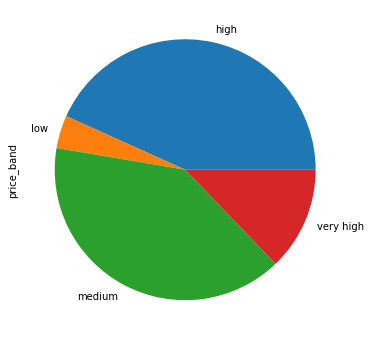

In [16]:
chart.plot(kind='pie',figsize=(6,6))

In [17]:
# Number of Cars Register in each year
chart=Data.groupby('year_of_registration')['age'].count()

<AxesSubplot:xlabel='year_of_registration', ylabel='Counts of Cars'>

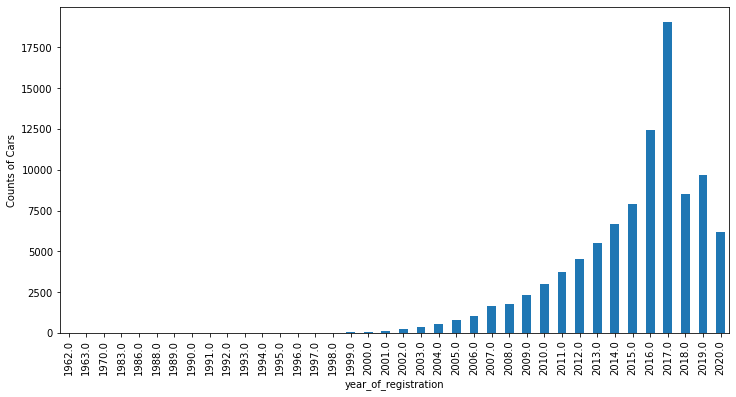

In [18]:
chart.plot(kind='bar',ylabel='Counts of Cars',figsize=(12,6))

Bar chart supports the existing theory that trends of sale in automobiles increases gradually, but in 2 year of COVID'19 it reduces almost half then years before

1- Highest number of car sales in UAE was in 2017




In [19]:
# Data Distribution with body types of cars
chart=Data.groupby('body_type')['body_type'].count()
chart

body_type
Coupe         3510
Estate        6095
Hatchback    59227
SUV          13202
Saloon       14235
Name: body_type, dtype: int64

In [20]:
## Count of each model type of car in high price band
high_price=np.where(Data['price_band']=='high')
high_price=Data.loc[high_price]

chart=high_price.groupby('standard_model')['standard_model'].count()

<AxesSubplot:xlabel='standard_model', ylabel='Count in High Price band'>

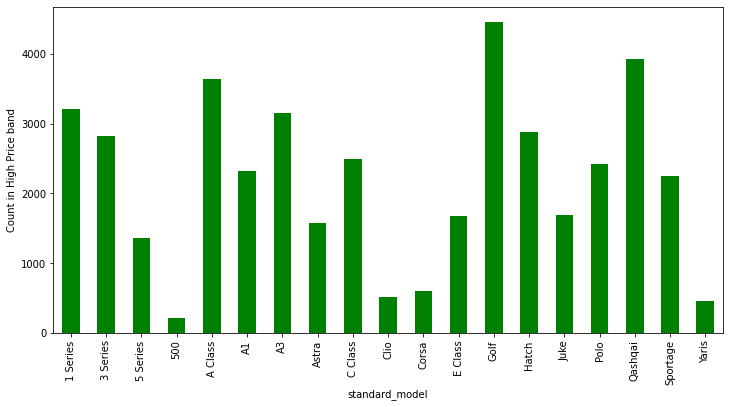

In [21]:
chart.plot(kind='bar',figsize=(12,6),color='green',ylabel='Count in High Price band')

Graph shows us that Following models has least number of cars that falls in high price band

1- 500

2- Yaris

3- Cllo



In [22]:
## Count of each model type of car in high price band
low_price=np.where(Data['price_band']=='low')
low_price=Data.loc[low_price]

chart=low_price.groupby('standard_model')['standard_model'].count()

<AxesSubplot:xlabel='standard_model', ylabel='Count in Low Price Band'>

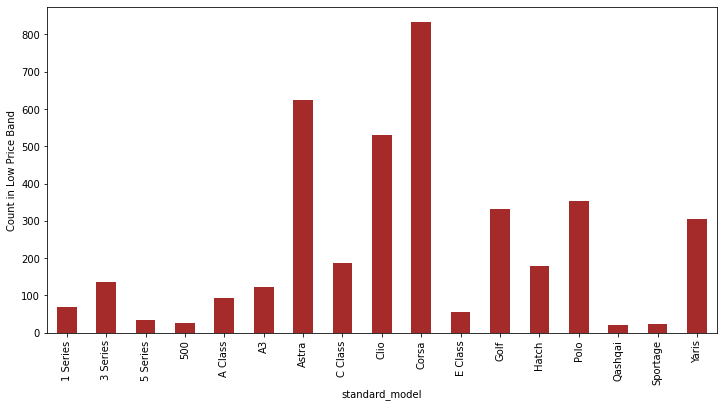

In [23]:
chart.plot(kind='bar',figsize=(12,6),color='Brown',ylabel='Count in Low Price Band')

Graph shows us that Following models has least number of cars that falls in low price band

1- Sportage

2- Qashqai

3- 5-Series




In [24]:
# Find Missing values
X=Data.isnull()

In [25]:
Y=np.where(X==True)
print("Number of Missing Records in Data: ",len(Y[0]))

Number of Missing Records in Data:  34


In [26]:
Data.loc[Y[0]]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,make_model,age,price_band
4675,202001316783627,NaN,70,Black,Fiat,500,USED,2020.0,Hatchback,False,Petrol,Fiat - 500,2,high
10062,202009213998222,NaN,10,Silver,Volkswagen,Golf,USED,2010.0,Hatchback,False,Petrol,Volkswagen - Golf,12,medium
12694,202010195182638,38015.0,NaN,Black,Volkswagen,Golf,USED,2015.0,Hatchback,False,Diesel,Volkswagen - Golf,7,medium
16085,202010255412754,143337.0,NaN,Black,BMW,3 Series,USED,2002.0,Saloon,False,Diesel,BMW - 3 Series,20,low
16579,202008313138945,NaN,63,White,Fiat,500,USED,2013.0,Hatchback,False,Petrol,Fiat - 500,9,medium
23110,202010295565469,NaN,64,White,Mercedes-Benz,C Class,USED,2014.0,Estate,False,Diesel,Mercedes-Benz - C Class,8,high
23777,202009264256298,NaN,15,Black,BMW,1 Series,USED,2015.0,Hatchback,False,Petrol,BMW - 1 Series,7,high
24939,202010104831802,NaN,20,White,Nissan,Qashqai,USED,2020.0,SUV,False,Petrol,Nissan - Qashqai,2,very high
32479,202001316783622,NaN,70,Grey,Fiat,500,USED,2020.0,Hatchback,False,Petrol,Fiat - 500,2,high
34677,202010094786917,NaN,20,Grey,Nissan,Qashqai,USED,2020.0,Hatchback,False,Diesel,Nissan - Qashqai,2,very high


### Data Cleaning and Prepration

 #### 1) Droping Non-related columns of data
 
 ##### a) Reference column: 
 
 Because reference column is unique for every record of cars, it certainly not gonna help in classification
 ##### b) crossover_car_and_van:
 Body type columns gives both information of body_type of each car as well as differenciate between car and van, so this columns crossover_car_and_van have no extra information
 
#### 2) Remove redundancy in data.

#####  a) Year of Registration
Age columns gives same information in more useful way of numeric form, count the age of car from year of registration till now. 

##### b) Reg Code
Show same information as given by year of registration and age columns

In [27]:
# Remove Reference Column
del Data['public_reference']
del RegressionData['public_reference']
print("Updated Shape of Data: ",Data.shape)

Updated Shape of Data:  (96269, 13)


In [28]:
# Drop crossover_car_and_van column
del Data['crossover_car_and_van']
del RegressionData['crossover_car_and_van']
print("Updated Shape of Data: ",Data.shape)

Updated Shape of Data:  (96269, 12)


In [29]:
# Drop Year of Registration 
del Data['year_of_registration']
del RegressionData['year_of_registration']
print("Updated Shape of Data: ",Data.shape)

Updated Shape of Data:  (96269, 11)


In [30]:
# Drop Reg_code 
del Data['reg_code']
del RegressionData['reg_code']
print("Updated Shape of Data: ",Data.shape)

Updated Shape of Data:  (96269, 10)


#### Handling missing records
As Millage is most important factor in predicting price of car, so remove records of cars having missing information of millage

In [31]:
Data=Data.dropna(axis=0,subset=['mileage'])
RegressionData=RegressionData.dropna(axis=0,subset=['mileage'])
print("Updated Shape of Data: ",Data.shape,RegressionData.shape)

Updated Shape of Data:  (96247, 10) (96247, 11)


### Model Training

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [33]:
# Separate Data columns and Target column
Y= copy.deepcopy(Data['price_band'])
Y2= np.array(RegressionData['price'])

del Data['price_band']
del RegressionData['price']
del RegressionData['standard_colour']

X= copy.deepcopy(Data)
X2= copy.deepcopy(RegressionData)

##### Encode categorical data 

In [34]:
X=pd.get_dummies(X)
X2= pd.get_dummies(X2)
X2

,mileage,age,standard_make_Audi,standard_make_BMW,standard_make_Fiat,standard_make_Kia,standard_make_MINI,standard_make_Mercedes-Benz,standard_make_Nissan,standard_make_Renault,...,make_model_Renault - Clio,make_model_Toyota - Yaris,make_model_Vauxhall - Astra,make_model_Vauxhall - Corsa,make_model_Volkswagen - Golf,make_model_Volkswagen - Polo,price_band_high,price_band_low,price_band_medium,price_band_very high
0,31534.0,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,52023.0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,29500.0,10,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,35300.0,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,47299.0,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,28225.0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
96265,122000.0,15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
96266,45000.0,7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
96267,4075.0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### Normalize Regression Data

In [35]:
scalerX = preprocessing.StandardScaler().fit(X2)
X2 = scalerX.transform(X2)

#### Split Data

In [36]:
# Split Data in 75:25 Ratio of Training and Testing

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=20211208,
    stratify=Y
)
print ("Shape of Training Data: \n" ,"Train X: ",X_train.shape,"\nTrain Y: " ,y_train.shape)
print ("\nShape of Testing Data: \n" ,"Train X: ",X_test.shape,"\nTrain Y: " ,y_test.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, Y2, test_size=0.25, random_state=20211208,
)
print ("Shape of Training Data: \n" ,"Train X: ",X_train.shape,"\nTrain Y: " ,y_train.shape)
print ("\nShape of Testing Data: \n" ,"Train X: ",X_test.shape,"\nTrain Y: " ,y_test.shape)

Shape of Training Data: 
 Train X:  (72185, 64) 
Train Y:  (72185,)

Shape of Testing Data: 
 Train X:  (24062, 64) 
Train Y:  (24062,)
Shape of Training Data: 
 Train X:  (72185, 64) 
Train Y:  (72185,)

Shape of Testing Data: 
 Train X:  (24062, 64) 
Train Y:  (24062,)


### Classification

#### Training Decision tree on different hyperparameters

In [37]:
# max_depth=5

dtc_md2 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
dtc_md2_acc_train = accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_bacc_train = balanced_accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_acc_test = accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_bacc_test = balanced_accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_acc_train = accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_bacc_train = balanced_accuracy_score(y_train, dtc_md2.predict(X_train))
dtc_md2_acc_test = accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md2_bacc_test = balanced_accuracy_score(y_test, dtc_md2.predict(X_test))

# max_depth=10
dtc_md5 = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
dtc_md5_acc_train = accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_bacc_train = balanced_accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_acc_test = accuracy_score(y_test, dtc_md5.predict(X_test))
dtc_md5_bacc_test = balanced_accuracy_score(y_test, dtc_md5.predict(X_test))
dtc_md5_acc_train = accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_bacc_train = balanced_accuracy_score(y_train, dtc_md5.predict(X_train))
dtc_md5_acc_test = accuracy_score(y_test, dtc_md2.predict(X_test))
dtc_md5_bacc_test = balanced_accuracy_score(y_test, dtc_md5.predict(X_test))

# max_depth=14
dtc_md7 = DecisionTreeClassifier(max_depth=14).fit(X_train, y_train)
dtc_md7_acc_train = accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_bacc_train = balanced_accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_acc_test = accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_bacc_test = balanced_accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_acc_train = accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_bacc_train = balanced_accuracy_score(y_train, dtc_md7.predict(X_train))
dtc_md7_acc_test = accuracy_score(y_test, dtc_md7.predict(X_test))
dtc_md7_bacc_test = balanced_accuracy_score(y_test, dtc_md7.predict(X_test))

# max_depth=20
dtc_md10 = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
dtc_md10_acc_train = accuracy_score(y_train, dtc_md10.predict(X_train))
dtc_md10_bacc_train = balanced_accuracy_score(y_train, dtc_md10.predict(X_train))
dtc_md10_acc_test = accuracy_score(y_test, dtc_md10.predict(X_test))
dtc_md10_bacc_test = balanced_accuracy_score(y_test, dtc_md10.predict(X_test))
dtc_md10_acc_train = accuracy_score(y_train, dtc_md10.predict(X_train))
dtc_md10_bacc_train = balanced_accuracy_score(y_train, dtc_md10.predict(X_train))
dtc_md10_acc_test = accuracy_score(y_test, dtc_md10.predict(X_test))
dtc_md10_bacc_test = balanced_accuracy_score(y_test, dtc_md10.predict(X_test))

# max_depth=25
dtc_md25 = DecisionTreeClassifier(max_depth=25).fit(X_train, y_train)
dtc_md25_acc_train = accuracy_score(y_train, dtc_md25.predict(X_train))
dtc_md25_bacc_train = balanced_accuracy_score(y_train, dtc_md25.predict(X_train))
dtc_md25_acc_test = accuracy_score(y_test, dtc_md25.predict(X_test))
dtc_md25_bacc_test = balanced_accuracy_score(y_test, dtc_md25.predict(X_test))
dtc_md25_acc_train = accuracy_score(y_train, dtc_md25.predict(X_train))
dtc_md25_bacc_train = balanced_accuracy_score(y_train, dtc_md25.predict(X_train))
dtc_md25_acc_test = accuracy_score(y_test, dtc_md25.predict(X_test))
dtc_md25_bacc_test = balanced_accuracy_score(y_test, dtc_md25.predict(X_test))


# max_depth=30
dtc_md30 = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dtc_md30_acc_train = accuracy_score(y_train, dtc_md30.predict(X_train))
dtc_md30_bacc_train = balanced_accuracy_score(y_train, dtc_md30.predict(X_train))
dtc_md30_acc_test = accuracy_score(y_test, dtc_md30.predict(X_test))
dtc_md30_bacc_test = balanced_accuracy_score(y_test, dtc_md30.predict(X_test))
dtc_md30_acc_train = accuracy_score(y_train, dtc_md30.predict(X_train))
dtc_md30_bacc_train = balanced_accuracy_score(y_train, dtc_md30.predict(X_train))
dtc_md30_acc_test = accuracy_score(y_test, dtc_md30.predict(X_test))
dtc_md30_bacc_test = balanced_accuracy_score(y_test, dtc_md30.predict(X_test))

### Regression

#### 1- Lasso Regression

In [38]:
S2=copy.deepcopy(Y2)

## LASSO Regression
model_ols =  linear_model.Lasso(normalize=True)
model_ols.fit(X2,Y2) 

Lasso(normalize=True)

#### 2- Linear Regression

In [39]:
## Linear Regression
LR=linear_model.LinearRegression(normalize=True)
LR.fit(X2,Y2)

LinearRegression(normalize=True)

#### 3- Decision tree Regressor

In [40]:
## Decisoin Tree Regressors

## Max depth = 5
regressor5= DecisionTreeRegressor(random_state = 0,min_impurity_decrease=0.23,max_depth=5)
regressor5.fit(X2_train,y2_train)

## Max depth = 10
regressor10= DecisionTreeRegressor(random_state = 0,min_impurity_decrease=0.23,max_depth=10)
regressor10.fit(X2_train,y2_train)

## Max depth = 13
regressor13= DecisionTreeRegressor(random_state = 0,min_impurity_decrease=0.23,max_depth=13)
regressor13.fit(X2_train,y2_train)

## Max depth = 20

regressor20= DecisionTreeRegressor(random_state = 0,min_impurity_decrease=0.23,max_depth=20)
regressor20.fit(X2_train,y2_train)

DecisionTreeRegressor(max_depth=20, min_impurity_decrease=0.23, random_state=0)

## 4- Model Evaluation, Analysis and Recommendations


#### Classification

##### 1) Accuracy Test on all trained models with different hyper-parameters

In [41]:
dtc_scores_df = pd.DataFrame(
    dict(
        micro_acc_train=[dtc_md2_acc_train, dtc_md5_acc_train, dtc_md7_acc_train,dtc_md10_acc_train,
                         dtc_md25_acc_train,dtc_md30_acc_train],
        macro_acc_train=[dtc_md2_bacc_train, dtc_md5_bacc_train,dtc_md7_bacc_train,dtc_md10_bacc_train,
                         dtc_md25_bacc_train,dtc_md30_bacc_train],
        micro_acc_test=[dtc_md2_acc_test, dtc_md5_acc_test, dtc_md7_acc_test,dtc_md10_acc_test,
                        dtc_md25_acc_test,dtc_md30_acc_test],
        macro_acc_test=[dtc_md2_bacc_test, dtc_md5_bacc_test, dtc_md7_bacc_test, dtc_md10_bacc_test,
                        dtc_md25_bacc_test, dtc_md30_bacc_test]
    ), 
    index=['DecisionTree_MaxDepth_5', 'DecisionTree_MaxDepth_7', 'DecisionTree_MaxDepth_14'
           ,'DecisionTree_MaxDepth_20','DecisionTree_MaxDepth_25','DecisionTree_MaxDepth_30']
)
dtc_scores_df.sort_values('macro_acc_test', ascending=False)

,micro_acc_train,macro_acc_train,micro_acc_test,macro_acc_test
DecisionTree_MaxDepth_14,0.893704,0.872521,0.847519,0.801986
DecisionTree_MaxDepth_20,0.940472,0.927069,0.836755,0.791738
DecisionTree_MaxDepth_25,0.966932,0.959549,0.828734,0.789389
DecisionTree_MaxDepth_30,0.984748,0.981716,0.823165,0.788460
DecisionTree_MaxDepth_7,0.856341,0.804413,0.778655,0.786954
DecisionTree_MaxDepth_5,0.780162,0.681133,0.778655,0.685759


#### 2) Justification of choosing models hyper-parameter

After choosing 6 different ranges of hyper-parameter we came across with interesting fact that, if max depth is below 10 than models performance were below power, but as gradually we increase parameter upto 14, noticible changes occur in test and training accuracy of Model.

Most important part of training is that, when we increase max depth parameter from 15, it will start increasing training accuracy but droping down the testing accuracy, which is one of the sign of overfitting on training data, so we came to know that 14 is the best max depth parameter for decision tree that can give us best results on testing time.

#### 3) Apply other Evaluation metrices on choosen model

##### a) F1 Score
##### b) Confusion Matrix

In [42]:
## a) F1 Score

FScore= f1_score(y_train, dtc_md10.predict(X_train),average='macro')

In [43]:
print ("F1 Score of trained model is: ", FScore)

F1 Score of trained model is:  0.9375708766579981


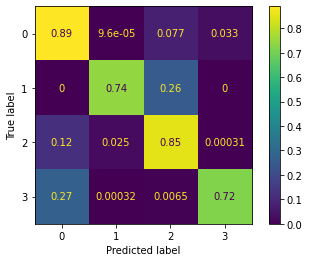

In [44]:
## b) Confusion Matrix

cm = confusion_matrix(
    y_test, dtc_md7.predict(X_test), normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Regression

In [45]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [-6.42830354e+02 -1.91915840e+03  0.00000000e+00  2.48236751e+02
 -1.79235492e-01  0.00000000e+00  0.00000000e+00  5.73783494e+02
 -0.00000000e+00 -4.07631899e-02 -0.00000000e+00 -4.46581538e+02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.46587011e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.63417918e-03 -0.00000000e+00
  1.18220392e-02  0.00000000e+00  0.00000000e+00 -1.88886206e-02
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  9.85807606e+00  0.00000000e+00 -3.33776655e+02
 -0.00000000e+00  3.87648599e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.23310197e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.99556798e+01 -3.57965172e+01
 -0.00000000e+00 -1.21160070e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -6.77067663e+02 -

##### Lasso Regression

In [46]:

predictedPrice = pd.DataFrame(model_ols.predict(X2), columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(Y2, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,96237,96238,96239,96240,96241,96242,96243,96244,96245,96246
Actual Price,19000.000000,13500.000000,9495.000000,7293.00000,11500.000000,11147.000000,6795.00000,14500.000000,2295.000000,4995.000000,...,4490.00000,11995.000000,4395.000000,20800.000000,4250.000000,18499.000000,1990.000000,5000.000000,18000.000000,7250.000000
Predicted Price,13531.404476,13321.013504,9263.906295,8695.48217,13410.193946,14995.089817,8530.96605,11937.145953,3609.485549,5856.613814,...,5829.63924,14024.880521,6036.500222,25887.992793,6492.806406,15825.439884,4657.204866,6983.537179,15574.670616,7279.245304


#### Linear Regression

In [47]:

predictedPrice = pd.DataFrame(LR.predict(X2), columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(Y2, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,96237,96238,96239,96240,96241,96242,96243,96244,96245,96246
Actual Price,19000.00000,13500.00000,9495.00000,7293.00000,11500.00000,11147.00000,6795.00000,14500.00000,2295.00000,4995.00000,...,4490.00000,11995.00000,4395.00000,20800.000000,4250.00000,18499.00000,1990.00000,5000.00000,18000.00000,7250.000000
Predicted Price,13575.85089,13577.22589,10918.22589,8056.47589,12430.22589,13606.60089,8187.47589,12480.22589,2017.97589,4030.72589,...,3538.47589,15731.85089,6340.72589,25804.460265,5487.97589,16323.85089,5129.85089,6009.97589,14487.10089,7426.103768


#### Decision Tree Regressor

In [48]:
Y_pred5= regressor5.predict(X2_test)
Y_pred10= regressor10.predict(X2_test)
Y_pred13= regressor13.predict(X2_test)
Y_pred20= regressor20.predict(X2_test)

In [49]:
from sklearn import metrics

MAR5=metrics.mean_absolute_error(y2_test, Y_pred5)
R2Score5= metrics.r2_score(y_true=y2_test, y_pred=Y_pred5)


MAR10=metrics.mean_absolute_error(y2_test, Y_pred10)
R2Score10= metrics.r2_score(y_true=y2_test, y_pred=Y_pred10)


MAR13=metrics.mean_absolute_error(y2_test, Y_pred13)
R2Score13= metrics.r2_score(y_true=y2_test, y_pred=Y_pred13)


MAR20=metrics.mean_absolute_error(y2_test, Y_pred20)
R2Score20= metrics.r2_score(y_true=y2_test, y_pred=Y_pred20)

In [50]:
dtc_scores_df = pd.DataFrame(
    dict(
        Mean_Absolute_Error =[MAR5,MAR10,MAR13,MAR20],
        R2_Score=[R2Score5,R2Score10,R2Score13,R2Score20],
    ), 
    index=['DecisionTree_MaxDepth_5', 'DecisionTree_MaxDepth_10', 'DecisionTree_MaxDepth_13'
           ,'DecisionTree_MaxDepth_20']
)
dtc_scores_df.sort_values('R2_Score', ascending=False)

,Mean_Absolute_Error,R2_Score
DecisionTree_MaxDepth_10,1378.426667,0.894079
DecisionTree_MaxDepth_13,1318.415609,0.892151
DecisionTree_MaxDepth_20,1417.760527,0.868294
DecisionTree_MaxDepth_5,1818.014675,0.852962


#### Justification in choosing model

Linear Regression and Decision tree regression both gives good results of above 80% R2 Score (Percentile), Regressor tree gives best error rate and R2 percentile on 13 Max depth Parameter, so we are choosing this as our Final regressor model

#### Difference between Actual and Predicted Values

In [51]:
Y_pred= regressor13.predict(X2_test)
y2_test=np.array(y2_test)

predictedPrice = pd.DataFrame(Y_pred, columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y2_test, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,24052,24053,24054,24055,24056,24057,24058,24059,24060,24061
Actual Price,14095.000000,9579.00000,5600.000000,14800.000000,24895.0,15989.000000,4400.000000,1500.000000,9800.000000,9273.000000,...,491.000000,2750.00000,26450.000000,31980.0,26490.00,25995.0,8998.000000,10500.00,13400.0,8990.000000
Predicted Price,14175.718169,9471.65035,8658.790656,14175.718169,33940.0,14433.681818,4434.606061,993.333333,8721.681818,8658.790656,...,872.183673,3378.45283,30941.813008,31000.0,24979.45,28331.4,9359.298838,11187.56,11375.3,8658.790656


#### Plot Error Terms / Rate of Choosed Model

/home/admins/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


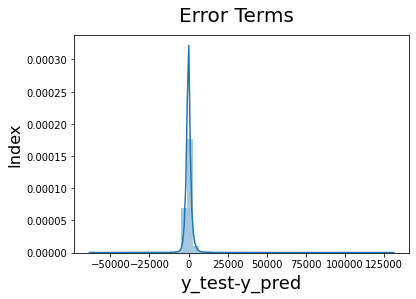

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
sns.distplot((y2_test-Y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

### Solution Understanding and Rrecommendations

From the above analysis we can say that we support following  existing statistical theories about the automobiles business that might become a catalyst in evolution of this industry. 

Many useful findings were there in the results of our model

1) Find out the line between best trained model, overfitted model and underfitted model

2) High price band target value has highest frequency of Data

3) Because of imbalance nature of Data, accuracy might be a misleading fact towards model

4) F1 score and confusion matrix shows us that model performed well on given cleaned and prepared Data

5) Regression model gives us good results of 89.2 percent (R2 Score), these results are not exceptionol but good to progress towards ideal Solution

##  5- Future Work

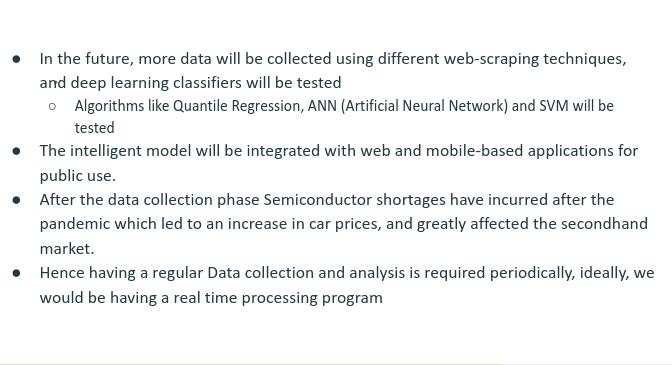